In [1]:

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
getObjectStorageFileWithCredentials_36050ddb3c4f40a18a7f066830ed7d30 <- function(container, filename) {
    # This functions returns a textConnection object for a file
    # from Bluemix Object Storage.

    if(!require(httr)) install.packages('httr')
    if(!require(RCurl)) install.packages('RCurl')
    library(httr, RCurl)
    auth_url <- paste("https://identity.open.softlayer.com",'/v3/auth/tokens', sep= '')
    auth_args <- paste('{"auth": {"identity": {"password": {"user": {"domain": {"id": ', "acc42c12cff74f9fb5e0ce17640fc696",'},"password": ',
                    "UL!Q4asjt8[I]lLu",',"name": ', "member_5e8e87bcb2a327d9c700afece746508f6c525227",'}},"methods": ["password"]}}}', sep='"')
    auth_response <- httr::POST(url = auth_url, body = auth_args)
    x_subject_token <-  headers(auth_response)[['x-subject-token']]
    auth_body <-  content(auth_response)
    access_url <-  unlist(lapply(auth_body[['token']][['catalog']], function(catalog){
        if((catalog[['type']] == 'object-store')){
            lapply(catalog[['endpoints']], function(endpoints){
                if(endpoints[['interface']] == 'public' && endpoints[['region_id']] == 'dallas') {
                    paste(endpoints[['url']], container, filename, sep='/')}
            })
        }
    }))
    data <- content(httr::GET(url = access_url, add_headers ("Content-Type" = "application/json", "X-Auth-Token" = x_subject_token)), as="text")
    textConnection(data)
}

df.data.1 <-  read.csv(file = getObjectStorageFileWithCredentials_36050ddb3c4f40a18a7f066830ed7d30("FinalProject", "LS.csv"))
head(df.data.1)


Loading required package: httr
Loading required package: RCurl
Loading required package: bitops

Attaching package: ‘RCurl’

The following object is masked from ‘package:SparkR’:

    base64



Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,totaldelay,MC,CEILING,VISIBLE,TEMP,Origin_Demand
2008,1,3,4,852,8,1009,10,0,475,...,0,0,0,0,0,0,30,10,54,57
2008,1,3,4,839,8,1016,9,5,256,...,0,13,0,0,47,0,30,10,54,57
2008,1,3,4,1053,10,1213,12,0,553,...,0,0,0,0,0,1,35,10,56,37
2008,1,3,4,1148,10,1259,12,3,888,...,0,0,0,26,39,1,35,10,56,37
2008,1,3,4,1801,16,1919,17,0,578,...,0,0,0,99,99,0,28,3,52,47
2008,1,3,4,1649,16,1816,17,3,119,...,0,1,0,36,48,0,28,3,52,47


Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/sff7-58a84c67e1da6e-fa49d0174b0c/R/libs’
(as ‘lib’ is unspecified)
Warning message:
“unable to access index for repository http://cran.cnr.berkeley.edu/src/contrib:
  cannot open URL 'http://cran.cnr.berkeley.edu/src/contrib/PACKAGES'”Warning message:
“package ‘leaps’ is not available (for R version 3.3.2)”Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”

Reordering variables and trying again:


[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 613645.6 368823.5 272564.2 207657.0 148753.7 146915.4 146527.6 146251.2
 [9] 146157.2 146067.9 145992.3 145965.5 145947.2 145938.3 145930.1 145927.2

[1] 0.9487078 0.9691657 0.9772088 0.9826330 0.9875569 0.9877083 0.9877385
 [8] 0.9877593 0.9877649 0.9877700 0.9877741 0.9877740 0.9877732 0.9877717
[15] 0.9877700 0.9877680

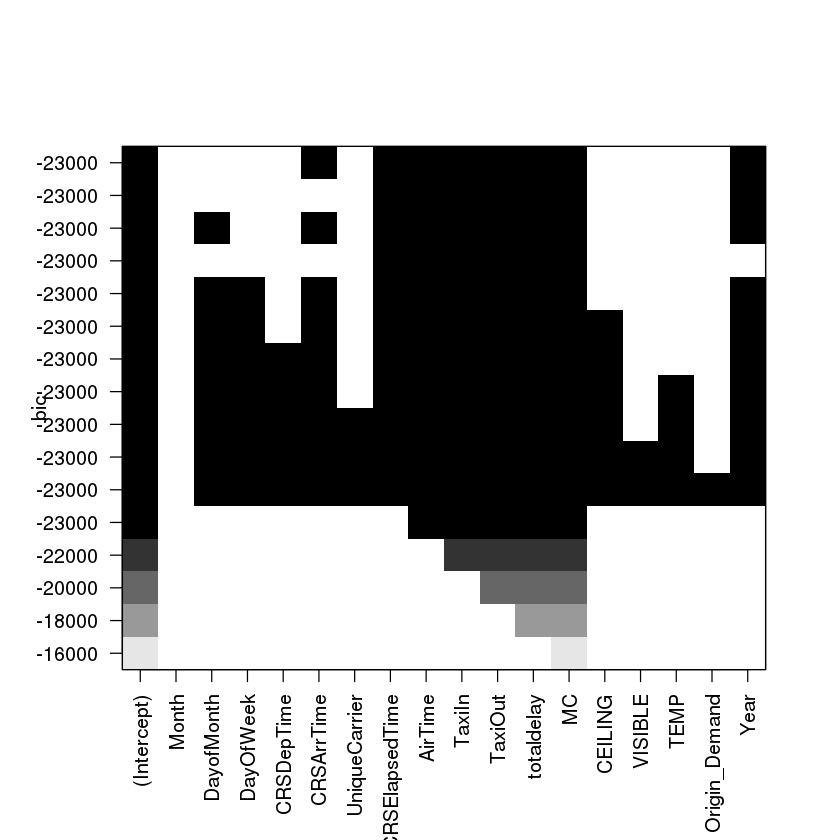

In [11]:
install.packages("leaps")
library(leaps)
##### Searching all subset models up to size 8 by default 
regfit.full=regsubsets(DepDelay~ Year + Month + DayofMonth + DayOfWeek + CRSDepTime + CRSArrTime + UniqueCarrier + 
                        + CRSElapsedTime + AirTime + TaxiIn + TaxiOut + totaldelay + MC + CEILING + 
                        VISIBLE + TEMP + Origin_Demand
 ,data=df.data.1,method="exhaustive",nvmax = 15)
plot(regfit.full)
reg.summary = summary(regfit.full) 
        



names(reg.summary)
reg.summary$rss
reg.summary$adjr2  

Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/sff7-58a84c67e1da6e-fa49d0174b0c/R/libs’
(as ‘lib’ is unspecified)
Warning message:
“unable to access index for repository http://cran.cnr.berkeley.edu/src/contrib:
  cannot open URL 'http://cran.cnr.berkeley.edu/src/contrib/PACKAGES'”Warning message:
“package ‘leaps’ is not available (for R version 3.3.2)”Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”

Reordering variables and trying again:


[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1]   613645.6   368823.5   272564.2   207657.0   148753.7   146915.4
 [7]   146527.6   146251.2 11614630.7 11594356.4   145992.3   146556.6
[13]   145947.2   146544.0   146495.2   145927.2

[1] 0.94870775 0.96916567 0.97720884 0.98263295 0.98755689 0.98770835
 [7] 0.98773848 0.98775931 0.02771415 0.02922837 0.98777406 0.98772449
[13] 0.98777322 0.98772091 0.98772269 0.98776798

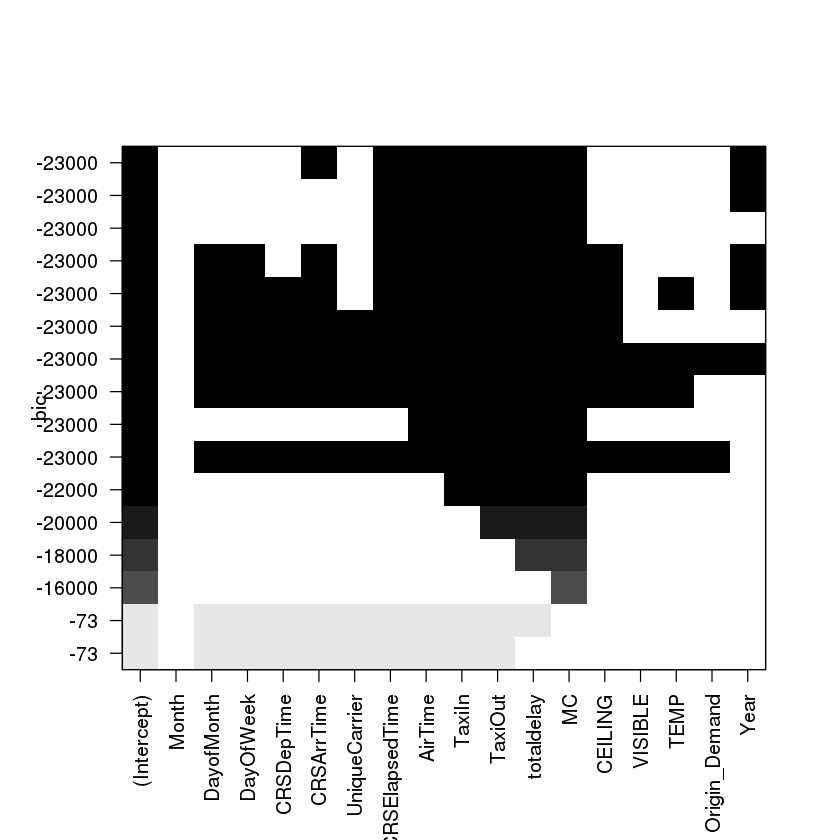

In [12]:
install.packages("leaps")
library(leaps)
regfit.stp=regsubsets(DepDelay~ Year + Month + DayofMonth + DayOfWeek + CRSDepTime + CRSArrTime + UniqueCarrier + 
                        + CRSElapsedTime + AirTime + TaxiIn + TaxiOut + totaldelay + MC + CEILING + VISIBLE + TEMP + Origin_Demand,
                         data=df.data.1,nvmax=15, method="seqrep") 
plot(regfit.stp)
reg.summary = summary(regfit.stp) 
        
# Print("Year + Month + DayofMonth + DayOfWeek + CRSDepTime + CRSArrTime + UniqueCarrier + 
#         + CRSElapsedTime + AirTime + TaxiIn + TaxiOut + totaldelay + MC + CEILING + 
#         VISIBLE + TEMP + Origin_Demand") 


names(reg.summary)
reg.summary$rss
reg.summary$adjr2  

Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/sff7-58a84c67e1da6e-fa49d0174b0c/R/libs’
(as ‘lib’ is unspecified)
Warning message:
“unable to access index for repository http://cran.cnr.berkeley.edu/src/contrib:
  cannot open URL 'http://cran.cnr.berkeley.edu/src/contrib/PACKAGES'”Warning message:
“package ‘leaps’ is not available (for R version 3.3.2)”Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”

Reordering variables and trying again:


[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 613645.6 368823.5 272564.2 207657.0 148753.7 146915.4 146527.6 146251.2
 [9] 146157.2 146067.9 145992.3 145965.5 145947.2 145938.3 145930.1 145927.2

[1] 0.9487078 0.9691657 0.9772088 0.9826330 0.9875569 0.9877083 0.9877385
 [8] 0.9877593 0.9877649 0.9877700 0.9877741 0.9877740 0.9877732 0.9877717
[15] 0.9877700 0.9877680

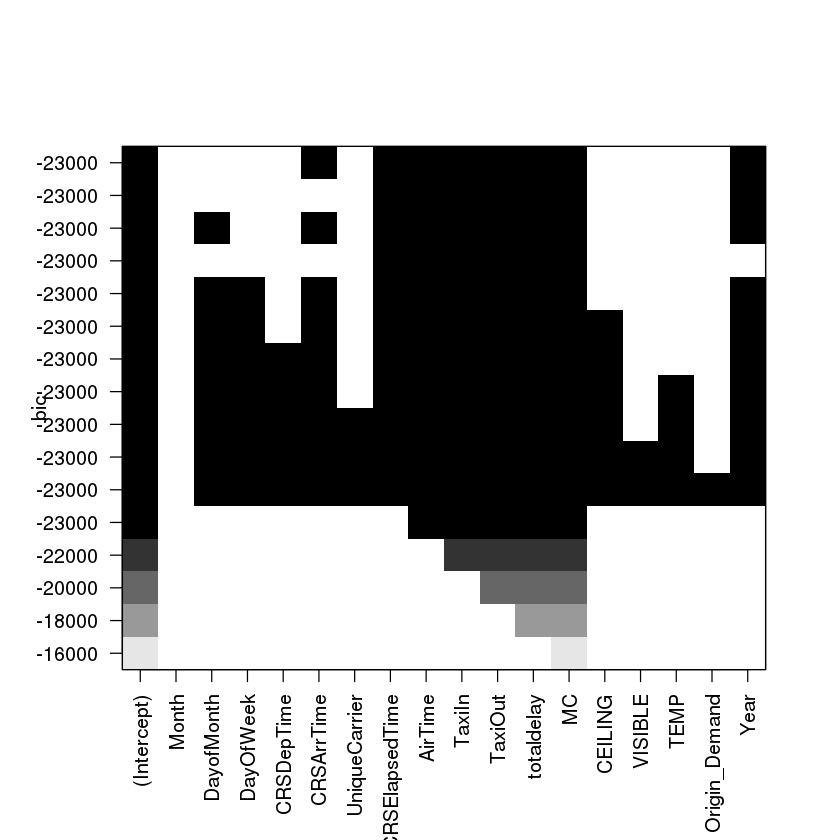

In [13]:
install.packages("leaps")
library(leaps)
regfit.fwd =regsubsets(DepDelay~ Year + Month + DayofMonth + DayOfWeek + CRSDepTime + CRSArrTime + UniqueCarrier + 
                        + CRSElapsedTime + AirTime + TaxiIn + TaxiOut + totaldelay + MC + CEILING + VISIBLE + TEMP + Origin_Demand,
                         data=df.data.1,nvmax=15, method="forward") 
plot(regfit.fwd)
reg.summary = summary(regfit.fwd) 
        
# Print("Year + Month + DayofMonth + DayOfWeek + CRSDepTime + CRSArrTime + UniqueCarrier + 
#         + CRSElapsedTime + AirTime + TaxiIn + TaxiOut + totaldelay + MC + CEILING + 
#         VISIBLE + TEMP + Origin_Demand") 


names(reg.summary)
reg.summary$rss
reg.summary$adjr2  

Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/sff7-58a84c67e1da6e-fa49d0174b0c/R/libs’
(as ‘lib’ is unspecified)
Warning message:
“unable to access index for repository http://cran.cnr.berkeley.edu/src/contrib:
  cannot open URL 'http://cran.cnr.berkeley.edu/src/contrib/PACKAGES'”Warning message:
“package ‘leaps’ is not available (for R version 3.3.2)”Warning message in leaps.setup(x, y, wt = wt, nbest = nbest, nvmax = nvmax, force.in = force.in, :
“1  linear dependencies found”

Reordering variables and trying again:


[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

[1] 613645.6 368823.5 272564.2 207657.0 148753.7 146915.4 146527.6 146251.2
 [9] 146157.2 146067.9 145992.3 145965.5 145947.2 145938.3 145930.1 145927.2

[1] 0.9487078 0.9691657 0.9772088 0.9826330 0.9875569 0.9877083 0.9877385
 [8] 0.9877593 0.9877649 0.9877700 0.9877741 0.9877740 0.9877732 0.9877717
[15] 0.9877700 0.9877680

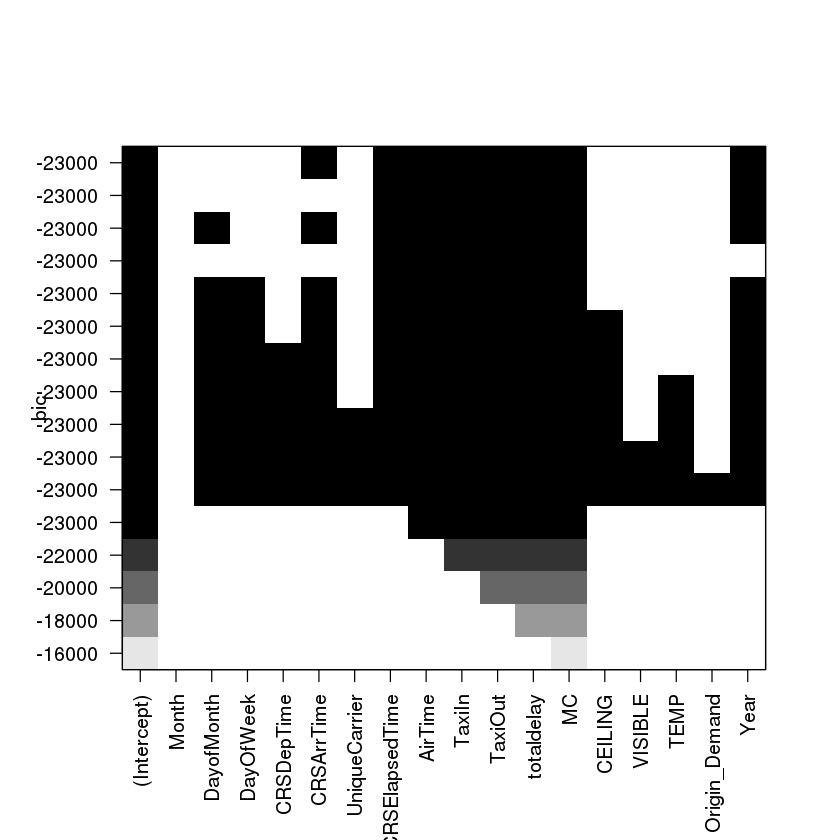

In [14]:
install.packages("leaps")
library(leaps)
regfit.bwd =regsubsets(DepDelay~ Year + Month + DayofMonth + DayOfWeek + CRSDepTime + CRSArrTime + UniqueCarrier + 
                        + CRSElapsedTime + AirTime + TaxiIn + TaxiOut + totaldelay + MC + CEILING + VISIBLE + TEMP + Origin_Demand,
                         data=df.data.1,nvmax=15, method="backward") 
plot(regfit.fwd)
reg.summary = summary(regfit.bwd) 
        
# Print("Year + Month + DayofMonth + DayOfWeek + CRSDepTime + CRSArrTime + UniqueCarrier + 
#         + CRSElapsedTime + AirTime + TaxiIn + TaxiOut + totaldelay + MC + CEILING + 
#         VISIBLE + TEMP + Origin_Demand") 


names(reg.summary)
reg.summary$rss
reg.summary$adjr2  